<a href="https://colab.research.google.com/github/Sylwiaes/machine-learning-bootcamp/blob/main/06_uczenie_maszynowe/07_k_najblizszych_sasiadow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### scikit-learn
>Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  
>
>Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)
>
>Podstawowa biblioteka do uczenia maszynowego w języku Python.
>
>Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
pip install scikit-learn
```

### Spis treści: 
1. [Import bibliotek](#a1)
2. [K-nearest Neighbour Algorithm - Algorytm K-najbliższych sąsiadów](#a2)
3. [Wykres Rozproszenia](#a3)
4. [K-nearest Neighbors Classifier](#a4)
5. [Wykres granic decyzyjnych](#a5)
6. [Grid Search](#6)

### <a name='a1'></a> Import bibliotek

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

### <a name='a2'></a> K-nearest Neighbour Algorithm - Algorytm K-najbliższych sąsiadów

Podstawą działania algorytmu jest:
* znalezienie z góry określonej liczby próbek treningowych znajdujących się najbliżej naszej obserwacji 
* przewidzenie na ich podstawie etykiety

Liczba sąsiadów jest określana przez użytkownika. Odległości zwykle kalkuluje sie przy pomocy metryki euklidesowej. 

In [ ]:
from sklearn.datasets import load_iris
raw_data = load_iris()
raw_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
raw_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df1 = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
df2 = pd.DataFrame(data=raw_data.target, columns=['class'])
df = pd.concat([df1, df2], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### <a name='a3'></a> Wykres Rozproszenia

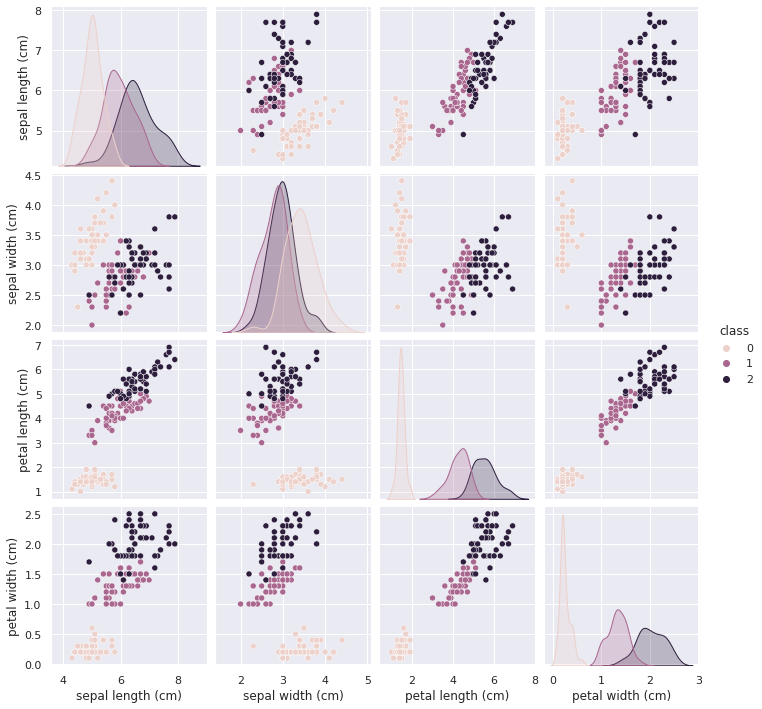

In [ ]:
_ = sns.pairplot(df, hue='class')
#w metodzie k-najbliższych sąsiadów wyznaczam k punkt, wybieram 5 najbliższych punktów do tego punktu i patrzę jaka to jest klasa

In [ ]:
df.corr() #zmienne wysoko skorelowane z klasą odrzucamy od modelu i skupiamy się na zmiennej w tym przypadku sepal length i sepal width

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
X = raw_data.data
y = raw_data.target
X = X[:, :2] #wycinamy 2 pierwsze zmienne na których będziemy pracować

print('X shape:', X.shape)
print('y shape:', y.shape)
# w tym przykładzie nie dzielimy danych na treningowe i testowe, ale poza tym przykładem takie dane rozdzielamy

X shape: (150, 2)
y shape: (150,)


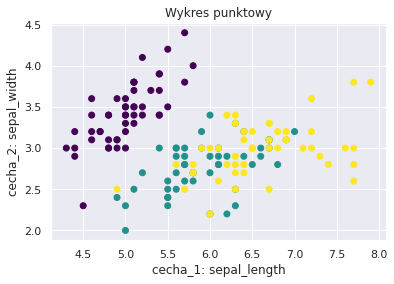

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Wykres punktowy')
plt.xlabel('cecha_1: sepal_length')
plt.ylabel('cecha_2: sepal_width')
plt.show()

In [ ]:
df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width'])
target = pd.DataFrame(y, columns=['class'])
df = pd.concat([df, target], axis=1)
px.scatter(df, x='sepal_length', y='sepal_width', color='class', width=600, height=400)

### <a name='a4'></a> K-nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #trenujemy nasz model

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy = classifier.score(X, y)
accuracy

0.8333333333333334

### <a name='a5'></a> Wykres granic decyzyjnych

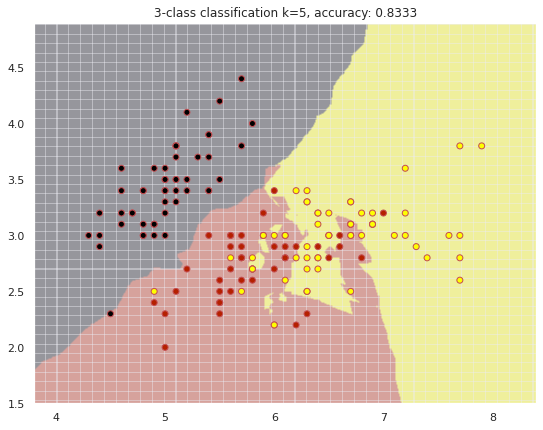

In [ ]:
#tworzymy siatkę granic decyzyjnych, dzięki której przewidzimy dane dla każdego punktu siatki
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k=5, accuracy: {accuracy:.4f}')
plt.show()
#żółte pola na obszarze czerwonym mówią o przeuczeniu modelu widoczne

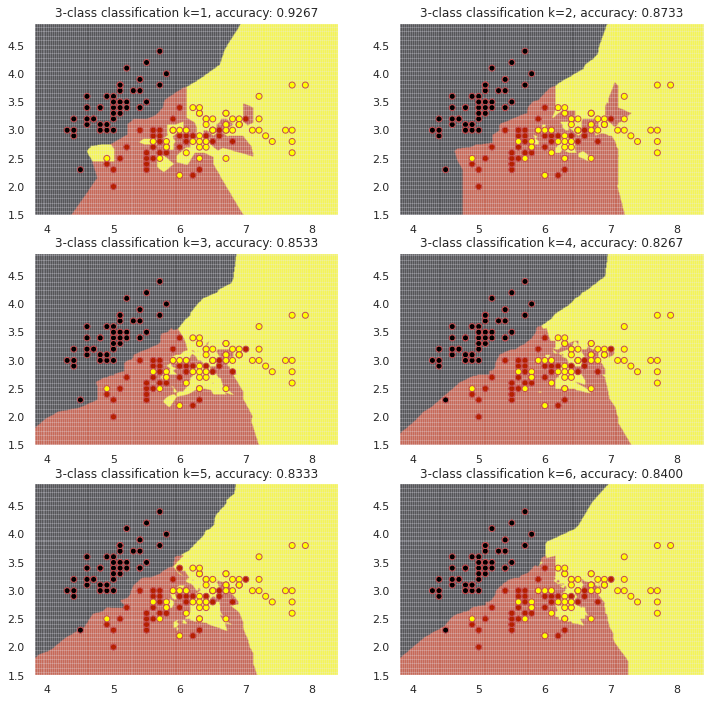

In [ ]:
#tworzymy pętlę, która iteruje po liczbie parametru k
plt.figure(figsize=(12, 12))
for i in range(1, 7):
    plt.subplot(3, 2, i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X, y)
    accuracy = classifier.score(X, y)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}, accuracy: {accuracy:.4f}')
plt.show()
#pierwszy model jest przeuczony

### <a name='6'></a> Grid Search

In [ ]:
#w celu znalezienia optymalnej liczby sąsiadów, tworzymy metodę Grid search, która pozwala na przeszukanie siatki parametrów 
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': range(2, 30)} #siatka naszych parametrów, od 2 do 30 sąsiadów, aby sprawdzić, która z tych wartości będzie najlepsza dla naszych danych

classifier = KNeighborsClassifier() #tworzymy instancję naszego modelu

gs = GridSearchCV(classifier, grid_params, cv=3) #grid_params-siatka danych, cv-cross validation-dzieli dane wg podanej liczby, na dwóch pierwszych częściach model trenuje dane i 
#sprawdza dane i ocenia na 3 części; kolejno model bierze 2 i 3 część i trenuje na 1 części; w ten sposób wykonywana jest 3-krotna cross walidacja
gs.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(2, 30)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
gs.best_params_ #ustala jaka liczba sąsiadów jest nalepsza dla naszego modelu i tę liczbę powinniśmy zastosować w naszym modelu

{'n_neighbors': 15}

In [ ]:
k = gs.best_params_['n_neighbors']
k

15

In [ ]:
classifier = gs.best_estimator_ #model zwraca najlepszy estymator i na podstrawie tego klasyfikatora tworzymy wykres i sprawdzamy jak model sobie radzi z nowymi klasyfikatorami
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

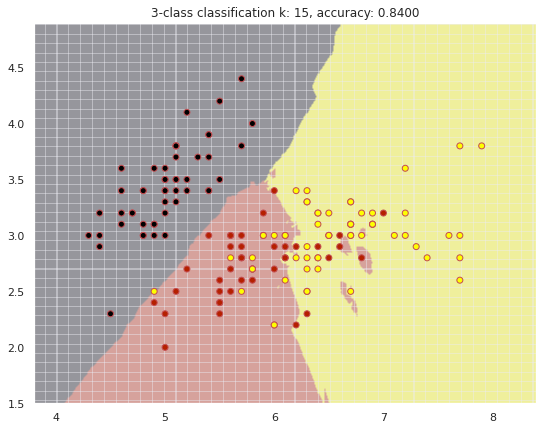

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = gs.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k: {k}, accuracy: {accuracy:.4f}')
plt.show()